In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy as sp
import astropy as fits

In [4]:
test_df = pd.read_csv(r'C:\Users\isaia\UCLA REU 2025 Summer\XRay Stuff\highz_msaid_public.csv', delim_whitespace = True, comment = '#', header = None)

C:\Users\isaia\AppData\Local\Temp\ipykernel_27988\339775396.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test_df = pd.read_csv(r'C:\Users\isaia\UCLA REU 2025 Summer\XRay Stuff\highz_msaid_public.csv', delim_whitespace = True, comment = '#', header = None)


In [5]:
test_df.columns = ['survey', 'field', 'prog_id', 'id', 'msaid', 'ra', 'dec', 'z', 'flag_lya', 'flag_agn', 'flag_z']

In [6]:
surveys = np.array(test_df['survey'].unique())

In [7]:
test_df[test_df['survey'] == 'jades'][['ra', 'dec', 'msaid', 'survey']]

,ra,dec,msaid,survey
0,53.183382,-27.770165,1180_134422,jades
1,53.156837,-27.767155,1180_5173,jades
2,53.133469,-27.760373,1180_12637,jades
3,53.155443,-27.756088,1180_13908,jades
4,53.087223,-27.777056,1180_17038,jades
...,...,...,...,...
468,34.324000,-5.167420,1215_29,jades
469,34.254834,-5.228512,1215_5335,jades
470,34.468767,-5.149842,1215_15,jades
471,34.551299,-5.199138,1215_3982,jades


In [8]:
survey_dict = {}
#test_df = pd.DataFrame(test_df)

for sur in surveys: 
    survey_dict[sur] = []
    survey_dict[sur].append(test_df[test_df['survey'] == sur][['ra', 'dec', 'msaid', 'survey']])

In [9]:
survey_dict

{'jades': [            ra        dec        msaid survey
  0    53.183382 -27.770165  1180_134422  jades
  1    53.156837 -27.767155    1180_5173  jades
  2    53.133469 -27.760373   1180_12637  jades
  3    53.155443 -27.756088   1180_13908  jades
  4    53.087223 -27.777056   1180_17038  jades
  ..         ...        ...          ...    ...
  468  34.324000  -5.167420      1215_29  jades
  469  34.254834  -5.228512    1215_5335  jades
  470  34.468767  -5.149842      1215_15  jades
  471  34.551299  -5.199138    1215_3982  jades
  472  34.539792  -5.166776    1215_2194  jades
  
  [323 rows x 4 columns]],
 'canucs': [             ra        dec         msaid  survey
  198   64.376136 -11.908744     1208_6092  canucs
  199   64.367899 -11.839161   1208_202264  canucs
  200   64.402066 -11.905835     1208_6536  canucs
  201   64.409620 -11.903841   1208_300001  canucs
  202   64.348919 -11.819627   1208_203798  canucs
  ..          ...        ...           ...     ...
  343  215.961216 

### Checking For Catalog Correspondances

In [10]:
from astropy.coordinates import SkyCoord
import astropy.units as u
import numpy as np
def find_nearest(target_ra, target_dec, ra_series, dec_series):
    # Ensure input series are float
    ra_series = pd.to_numeric(ra_series, errors = 'coerce').values
    dec_series = pd.to_numeric(dec_series, errors = 'coerce').values
    target = SkyCoord(ra= target_ra * u.deg, dec = target_dec * u.deg)
    coords = SkyCoord(ra=ra_series * u.deg, dec = dec_series * u.deg) 
    separation = target.separation(coords)
    idx = np.argmin(separation)
    return(idx)


### SXDS Catalog Test

In [11]:
SXDS_positions = [
    [33.85387, -4.92870],
    [33.85392, -4.90221],
    [33.86346, -5.03354],
    [33.87124, -4.96292],
    [33.87257, -4.89099],
    [33.87878, -4.98760],
    [33.89418, -5.06675],
    [33.90476, -4.94904],
    [33.90754, -5.08932],
    [33.91171, -5.01450]
]

In [12]:
test_df.set_index('msaid', inplace= True) 

In [13]:
matches = []
for ra, dec in SXDS_positions:
    idx = find_nearest(ra, dec, test_df['ra'], test_df['dec'])
    row = test_df.iloc[idx]
    matches.append((row.name, row['survey'], row['ra'], row['dec']))

In [14]:
# Same galaxy seemed to match the be the closest candidate to the SXDS Galaxy positions. 

matches

[('4233_62778', 'rubies', 34.2262053, -5.2033871),
 ('4233_62778', 'rubies', 34.2262053, -5.2033871),
 ('4233_62778', 'rubies', 34.2262053, -5.2033871),
 ('4233_62778', 'rubies', 34.2262053, -5.2033871),
 ('4233_62778', 'rubies', 34.2262053, -5.2033871),
 ('4233_62778', 'rubies', 34.2262053, -5.2033871),
 ('4233_62778', 'rubies', 34.2262053, -5.2033871),
 ('4233_62778', 'rubies', 34.2262053, -5.2033871),
 ('4233_54720', 'rubies', 34.2191221, -5.2195479),
 ('4233_62778', 'rubies', 34.2262053, -5.2033871)]

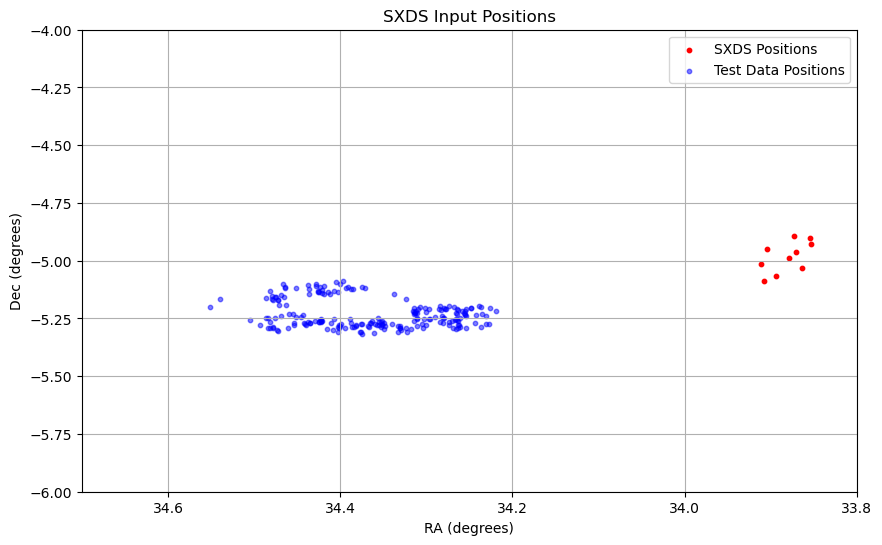

In [15]:
sxds_ra = [pos[0] for pos in SXDS_positions]
sxds_dec = [pos[1] for pos in SXDS_positions]
plt.figure(figsize=(10, 6))
plt.scatter(sxds_ra, sxds_dec, color='red', label='SXDS Positions', s=10)
plt.scatter(test_df['ra'], test_df['dec'], color='blue', label='Test Data Positions', s=10, alpha=0.5)
plt.xlabel('RA (degrees)')
plt.ylabel('Dec (degrees)')
plt.xlim(33.8, 34.7)  # Adjust limits based on SXDS RA range
plt.ylim(-6, -4)  # Adjust limits based on
plt.title('SXDS Input Positions')
plt.legend()
plt.gca().invert_xaxis()  # RA increases to the left 
plt.grid(True) 
plt.show()

In [16]:
catalog_coords = SkyCoord(ra=test_df['ra'].values * u.deg, dec=test_df['dec'].values * u.deg)
sxds_coords = SkyCoord(ra=[ra for ra, dec in SXDS_positions] * u.deg,
                       dec=[dec for ra, dec in SXDS_positions] * u.deg)

idx, sep2d, _ = sxds_coords.match_to_catalog_sky(catalog_coords)
threshold = 2.0 # Allowed offset
mask = sep2d.arcsecond <= threshold
matched_sxds = sxds_coords[mask]
matched_catalog = catalog_coords[idx[mask]]
print(f"Matched {len(matched_sxds)} SXDS positions within {threshold} arcseconds.")

Matched 0 SXDS positions within 2.0 arcseconds.


In [17]:
def match_coords(ra_test, dec_test, ra_paper, dec_paper, threshold=2.0):
    test_coords = SkyCoord(ra=ra_test.values * u.deg, dec=dec_test.values * u.deg)

    # Ensure ra_paper and dec_paper are array-like
    ra_paper = np.atleast_1d(ra_paper)
    dec_paper = np.atleast_1d(dec_paper)

    ref_coords = SkyCoord(ra=ra_paper * u.deg, dec=dec_paper * u.deg)
    idx, sep2d, _ = ref_coords.match_to_catalog_sky(test_coords)
    mask = sep2d.arcsecond <= threshold
    matched_test_coords = test_coords[idx[mask]]
    matched_ref_coords = ref_coords[mask]

    print(f"Matched {len(matched_test_coords)} positions within {threshold} arcseconds.")
    return matched_test_coords, matched_ref_coords, sep2d[mask].arcsecond, idx


In [18]:
#Use this for Single Galaxy Checking. 

match_coords(test_df['ra'], test_df['dec'], 3.584758, -30.343630, 25)

Matched 1 positions within 25 arcseconds.


(<SkyCoord (ICRS): (ra, dec) in deg
     [(3.5861068, -30.3373462)]>,
 <SkyCoord (ICRS): (ra, dec) in deg
     [(3.584758, -30.34363)]>,
 array([23.0065615]),
 array([753], dtype=int64))

In [19]:
match_coords(
    test_df['ra'], test_df['dec'],
    list(ra for ra, dec in SXDS_positions),
    list(dec for ra, dec in SXDS_positions),
    threshold = 1000
)


Matched 0 positions within 1000 arcseconds.


(<SkyCoord (ICRS): (ra, dec) in deg
     []>,
 <SkyCoord (ICRS): (ra, dec) in deg
     []>,
 array([], dtype=float64),
 array([1176, 1176, 1176, 1176, 1176, 1176, 1176, 1176, 1313, 1176],
       dtype=int64))

SXDS Galaxies are NOT part of this dataset

### 'Closing Pandora's Box' Paper Test

In [20]:
test_df['field'].unique()

array(['gds', 'gdn', 'macs0417', 'abell370', 'macs0416', 'macs1423',
       'egs', 'uds', 'a2744', 'macs0647', '10335051', '04405244',
       '09554528', '22031851', '04095317', '14375044', '08594114',
       '03146712', '00373337', '09562847', '09535153', '07502917',
       '08530309', 'smacs0723', 'rxj2129', 'rxcj2248', 'abell1703'],
      dtype=object)

In [21]:
test_df[test_df['field'] == 'a2744'].count()

survey      220
field       220
prog_id     220
id          220
ra          220
dec         220
z           220
flag_lya    220
flag_agn    220
flag_z      220
dtype: int64

In [22]:
CPB_df = pd.read_csv("Closing Pandoras Box Tabular Data - Sheet1.csv")

In [23]:
CPB_df

,1,701380,7712,ACIS-I,NONE,7,8.07,A2744,Garmire,00 14 19.20,...,NONE.1,7.1,8.07.1,A2744.1,Garmire.1,00 14 19.20.1,-30 23 07.20.1,archived.1,VFAINT.1,TE.1
0,2,704323,25277,ACIS-I,NONE,19.0,18.68,Abell 2744,Bogdan,00 14 21.25,...,NONE,19.0,18.68,Abell 2744,Bogdan,00 14 21.25,-30 24 04.40,archived,VFAINT,TE
1,3,704323,25278,ACIS-I,NONE,10.0,9.78,Abell 2744,Bogdan,00 14 21.25,...,NONE,10.0,9.78,Abell 2744,Bogdan,00 14 21.25,-30 24 04.40,archived,VFAINT,TE
2,4,704323,25279,ACIS-I,NONE,25.0,24.46,Abell 2744,Bogdan,00 14 21.25,...,NONE,25.0,24.46,Abell 2744,Bogdan,00 14 21.25,-30 24 04.40,archived,VFAINT,TE
3,5,704323,25907,ACIS-I,NONE,38.0,36.80,Abell 2744,Bogdan,00 14 21.25,...,NONE,38.0,36.80,Abell 2744,Bogdan,00 14 21.25,-30 24 04.40,archived,VFAINT,TE
4,6,704323,25908,ACIS-I,NONE,23.0,22.61,Abell 2744,Bogdan,00 14 21.25,...,NONE,23.0,22.61,Abell 2744,Bogdan,00 14 21.25,-30 24 04.40,archived,VFAINT,TE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,98,704323,28952,ACIS-I,NONE,14.0,13.79,Abell 2744,Bogdan,00 14 21.25,...,NONE,14.0,13.79,Abell 2744,Bogdan,00 14 21.25,-30 24 04.40,archived,VFAINT,TE
913,99,800151,2212,ACIS-S,NONE,25.0,24.82,A2744,David,00 14 13.00,...,NONE,25.0,24.82,A2744,David,00 14 13.00,-30 22 40.00,archived,VFAINT,TE
914,100,800633,7915,ACIS-I,NONE,20.0,18.62,Abell 2744,Kempner,00 14 19.40,...,NONE,20.0,18.62,Abell 2744,Kempner,00 14 19.40,-30 23 29.50,archived,VFAINT,TE
915,101,800633,8477,ACIS-I,NONE,50.0,45.91,Abell 2744,Kempner,00 14 19.40,...,NONE,50.0,45.91,Abell 2744,Kempner,00 14 19.40,-30 23 29.50,archived,VFAINT,TE


In [24]:
half_cols = CPB_df.columns[:len(CPB_df.columns)//2]
CPB_df = CPB_df[half_cols]

CPB_df.columns = [
    'Row', 'Seq_Num', 'Obs_ID', 'Instrument', 'Grating', 'Appr_Exp', 'Exposure',
    'Target_Name', 'PI_Name', 'RA', 'Dec', 'Status', 'Data_Mode', 'Exp_Mode'
]

In [25]:
CPB_df = CPB_df.drop_duplicates()

In [26]:
CPB_df

,Row,Seq_Num,Obs_ID,Instrument,Grating,Appr_Exp,Exposure,Target_Name,PI_Name,RA,Dec,Status,Data_Mode,Exp_Mode
0,2,704323,25277,ACIS-I,NONE,19.0,18.68,Abell 2744,Bogdan,00 14 21.25,-30 24 04.40,archived,VFAINT,TE
1,3,704323,25278,ACIS-I,NONE,10.0,9.78,Abell 2744,Bogdan,00 14 21.25,-30 24 04.40,archived,VFAINT,TE
2,4,704323,25279,ACIS-I,NONE,25.0,24.46,Abell 2744,Bogdan,00 14 21.25,-30 24 04.40,archived,VFAINT,TE
3,5,704323,25907,ACIS-I,NONE,38.0,36.80,Abell 2744,Bogdan,00 14 21.25,-30 24 04.40,archived,VFAINT,TE
4,6,704323,25908,ACIS-I,NONE,23.0,22.61,Abell 2744,Bogdan,00 14 21.25,-30 24 04.40,archived,VFAINT,TE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,99,800151,2212,ACIS-S,NONE,25.0,24.82,A2744,David,00 14 13.00,-30 22 40.00,archived,VFAINT,TE
98,100,800633,7915,ACIS-I,NONE,20.0,18.62,Abell 2744,Kempner,00 14 19.40,-30 23 29.50,archived,VFAINT,TE
99,101,800633,8477,ACIS-I,NONE,50.0,45.91,Abell 2744,Kempner,00 14 19.40,-30 23 29.50,archived,VFAINT,TE
100,102,800633,8557,ACIS-I,NONE,30.0,27.81,Abell 2744,Kempner,00 14 19.40,-30 23 29.50,archived,VFAINT,TE


In [27]:
CPB_df.dtypes

Row              int64
Seq_Num          int64
Obs_ID           int64
Instrument      object
Grating         object
Appr_Exp       float64
Exposure       float64
Target_Name     object
PI_Name         object
RA              object
Dec             object
Status          object
Data_Mode       object
Exp_Mode        object
dtype: object

In [28]:
cpb_coords = SkyCoord(ra=CPB_df['RA'], dec=CPB_df['Dec'], unit=(u.hourangle, u.deg))
ra_cpb = cpb_coords.ra.deg
dec_cpb = cpb_coords.dec.deg
match_coords(test_df['ra'], test_df['dec'], ra_cpb, dec_cpb, threshold = 8)


Matched 3 positions within 8 arcseconds.


(<SkyCoord (ICRS): (ra, dec) in deg
     [(3.5810443, -30.3895607), (3.5810443, -30.3895607),
      (3.5810443, -30.3895607)]>,
 <SkyCoord (ICRS): (ra, dec) in deg
     [(3.58083333, -30.39152778), (3.58083333, -30.39152778),
      (3.58083333, -30.39152778)]>,
 array([7.11171907, 7.11171907, 7.11171907]),
 array([676, 676, 676, 676, 676, 676, 676, 676, 676, 676, 676, 676, 676,
        676, 676, 676, 676, 676, 676, 676, 676, 676, 676, 676, 676, 676,
        676, 676, 676, 676, 676, 676, 676, 676, 676, 676, 676, 676, 676,
        676, 676, 676, 676, 676, 676, 676, 676, 676, 676, 676, 676, 676,
        676, 676, 676, 676, 676, 676, 676, 676, 676, 676, 676, 676, 676,
        676, 676, 676, 676, 676, 676, 676, 676, 676, 676, 676, 676, 676,
        676, 676, 676, 676, 676, 676, 676, 676, 676, 676, 676, 676, 676,
        676, 676, 676, 676, 676, 676, 741, 684, 684, 684, 684], dtype=int64))

In [29]:
test_df['ra']

msaid
1180_134422         53.183382
1180_5173           53.156837
1180_12637          53.133469
1180_13908          53.155443
1180_17038          53.087223
                      ...    
2478_11174_0151    342.171564
2478_4_02          198.780017
2478_6_02          198.754234
2478_1_02          198.747582
2478_23_02         198.755952
Name: ra, Length: 1364, dtype: float64

In [30]:
test_df

,survey,field,prog_id,id,ra,dec,z,flag_lya,flag_agn,flag_z
msaid,,,,,,,,,,
1180_134422,jades,gds,1180,134422,53.183382,-27.770165,8.37700,-99,-99,-99
1180_5173,jades,gds,1180,5173,53.156837,-27.767155,7.98100,0,0,-99
1180_12637,jades,gds,1180,12637,53.133469,-27.760373,7.66300,0,0,-99
1180_13908,jades,gds,1180,13908,53.155443,-27.756088,7.62900,0,0,-99
1180_17038,jades,gds,1180,17038,53.087223,-27.777056,7.57500,0,0,-99
...,...,...,...,...,...,...,...,...,...,...
2478_11174_0151,stark,rxcj2248,2478,11174,342.171564,-44.512157,5.34344,-99,-99,-99
2478_4_02,stark,abell1703,2478,4,198.780017,51.839995,7.87300,-99,-99,-99
2478_6_02,stark,abell1703,2478,6,198.754234,51.834663,7.04405,-99,-99,-99


In [31]:
t_df = test_df[test_df['survey'] == 'glass']

print("Test DF RA range:", t_df['ra'].min(), "to", t_df['ra'].max())
print("CPB RA range:", ra_cpb.min(), "to", ra_cpb.max())
print("Test DF Dec range:", t_df['dec'].min(), "to", t_df['dec'].max())
print("CPB Dec range:", dec_cpb.min(), "to", dec_cpb.max())

Test DF RA range: 3.5649015 to 3.6171626
CPB RA range: 3.5541666666666663 to 3.5885416666666665
Test DF Dec range: -30.4255459 to -30.3792254
CPB Dec range: -30.40122222222222 to -30.37777777777778


### 'The Dissection of Abell 2744: A Rich Cluster Growing Through Major and Minor Mergers' Paper


In [32]:
import re

# Load and filter lines
with open('ds9.reg', "r") as f:
    lines = f.readlines()

# Filter for lines with "circle(" in fk5 system
circle_lines = [line for line in lines if "circle(" in line]

# Extract RA, Dec, Radius
data = []
for line in circle_lines:
    match = re.search(r"circle\(([^,]+),\s*([^,]+),\s*([^)]+)\)", line)
    if match:
        ra, dec, radius = map(lambda x: x.strip().replace('"', ''), match.groups())
        data.append((float(ra), float(dec), float(radius)))

# Make into DataFrame
df = pd.DataFrame(data, columns=["RA", "Dec", "Radius_arcsec"])
print(df.head())

         RA        Dec  Radius_arcsec
0  3.518738 -30.417911          4.102
1  3.519100 -30.416146          0.000
2  3.518452 -30.416146          0.000
3  3.608213 -30.409954          2.746
4  3.610548 -30.395711          3.022


In [33]:

df_coords = SkyCoord(ra=df['RA'], dec=df['Dec'], unit=(u.hourangle, u.deg))
ra_df = df_coords.ra.deg
dec_df = df_coords.dec.deg

# Drop any rows with NaN in RA or Dec (i.e., failed conversions)
df_clean = df.dropna(subset=['RA', 'Dec'])


match_coords(test_df['ra'], test_df['dec'], ra_df, dec_df, threshold=1000)

Matched 0 positions within 1000 arcseconds.


(<SkyCoord (ICRS): (ra, dec) in deg
     []>,
 <SkyCoord (ICRS): (ra, dec) in deg
     []>,
 array([], dtype=float64),
 array([440, 440, 440, 440, 440, 440, 440, 440, 440, 440, 116, 116, 116,
        116, 116], dtype=int64))

In [34]:
ra_df[0]
dec_df[0]

-30.4179115

In [35]:
test_df['ra'].head()
test_df['dec'].head()

msaid
1180_134422   -27.770165
1180_5173     -27.767155
1180_12637    -27.760373
1180_13908    -27.756088
1180_17038    -27.777056
Name: dec, dtype: float64

In [36]:
df['RA']

0     3.518738
1     3.519100
2     3.518452
3     3.608213
4     3.610548
5     3.630158
6     3.629773
7     3.629788
8     3.539433
9     3.522769
10    3.653738
11    3.653549
12    3.653230
13    3.653040
14    3.645967
Name: RA, dtype: float64

### An unambiguous AGN and a Balmer break in an Ultraluminous Little Red Dot

In [37]:
from astropy.coordinates import SkyCoord
import astropy.units as u

# Create SkyCoord for the LRD (the single target coordinate)
LRD_coord = SkyCoord(ra=3.584758 * u.deg, dec=-30.343630 * u.deg)

# Create SkyCoord array for all sources in test_df
catalog_coords = SkyCoord(ra=test_df['ra'].values * u.deg, dec=test_df['dec'].values * u.deg)

# Match LRD to nearest in test_df
idx, sep2d, _ = LRD_coord.match_to_catalog_sky(catalog_coords)

# Filter based on threshold (e.g. 2 arcseconds)
if sep2d.arcsecond <= 2:
    print("✅ Match found:")
    print(test_df.iloc[idx])
    print(f"Separation: {sep2d.arcsecond:.2f} arcsec")
else:
    print("❌ No match within 2 arcsec.")
    print(f"Closest separation: {sep2d.arcsecond[0]:.2f} arcsec")
    print(idx)


❌ No match within 2 arcsec.
Closest separation: 23.01 arcsec
753


In [38]:
test_df.iloc[753]

survey        uncover
field           a2744
prog_id          2561
id              48510
ra           3.586107
dec        -30.337346
z               5.632
flag_lya            0
flag_agn            0
flag_z              0
Name: 2561_48510, dtype: object

## Triangulation Approach

In [39]:
from itertools import combinations


def triangle_fingerprint(coords): 
    #Return sorted pairwise angular sep. for a trangle of SkyCoord Objects
    assert len(coords) == 3 
    sep = [coords[i].separation(coords[j]).arcsec for i, j in combinations(range(3), 2)]
    return np.sort(sep)

# Assume both are SkyCoord arrays with len > 3
def generate_fingerprints(coord_array):
    triangles = list(combinations(coord_array, 3))
    return [triangle_fingerprint(list(tri)) for tri in triangles]

def match_fingerprints(test_fps, catalog_fps, tol=1.0):
    matches = []
    for i, tf in enumerate(test_fps):
        for j, cf in enumerate(catalog_fps):
            if np.all(np.abs(tf - cf) < tol):
                matches.append((i, j))
    return matches


test_coords = SkyCoord(ra=test_df['ra'].values * u.deg,
                       dec=test_df['dec'].values * u.deg)

# Example: catalog data (replace with your catalog)
cat_coords = SkyCoord(ra=df['RA'].values * u.deg,
                      dec=df['Dec'].values * u.deg)



test_fps = generate_fingerprints(test_coords[:10]) 
cat_fps = generate_fingerprints(cat_coords[:10]) 

matches = match_fingerprints(test_fps, cat_fps, tol=1.0)
print(f"Found {len(matches)} triangle matches")
print(matches)


Found 0 triangle matches
[]


In [40]:
test_fps = generate_fingerprints(test_coords[:10]) 
cat_fps = generate_fingerprints(cpb_coords[:10]) 

matches = match_fingerprints(test_fps, cat_fps, tol=1.0)
print(f"Found {len(matches)} triangle matches")
print(matches)


Found 0 triangle matches
[]


### Region File Code for each Survey

In [43]:
test_df.index

Index(['1180_134422', '1180_5173', '1180_12637', '1180_13908', '1180_17038',
       '1180_135134', '1180_13552', '1180_30141745', '1180_9315',
       '1180_30147912',
       ...
       '4233_32218', '4233_60372', '2478_3_0151', '2478_1_0151', '2478_4_0151',
       '2478_11174_0151', '2478_4_02', '2478_6_02', '2478_1_02', '2478_23_02'],
      dtype='object', name='msaid', length=1364)

In [1]:
def get_region(survey, rad, output_file = 'region_output.reg', color = 'green', width = 1, custom_color = None):
    #Include header lines required by DS9
    region = [
        "# Region file format: DS9 version 4.1",
        f"global color={color} dashlist=8 3 width={width} font=\"helvetica 10 normal roman\" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1",
        "icrs"
    ]
    subset = test_df[test_df['survey'] == survey] 
    for idx, row in subset.iterrows(): 
        RA, DEC = row['ra'], row['dec'] 
        galaxy_id = idx 
        circle_color = custom_color if custom_color else color

        # Use comment-style attributes for compatibility:
        region.append(f"circle({RA},{DEC},{rad}\") # color={circle_color} text={{ {galaxy_id} }}")

    with open(output_file, 'w') as f: 
        for line in region: 
            f.write(line + '\n')
    return(region)



In [2]:
glass_region = get_region('glass', 2, color = 'blue')

NameError: name 'test_df' is not defined

In [ ]:
from astropy.io import fits
from astropy.wcs import WCS
import numpy as np

# Reopen the file to reinitialize WCS correctly
with fits.open("acisf07715N003_evt2.fits") as hdul:
    wcs = WCS(hdul[0].header)  # Use a safe variable name like 'wcs'

# Set image dimensions based on your DS9 display
img_h, img_w = 1024, 1024

# Convert sky coords to pixel coords
ra_dec = test_df[test_df['survey'] == 'jades'][['ra', 'dec']].values
x, y = wcs.all_world2pix(ra_dec[:, 0], ra_dec[:, 1], 0)

# Filter coordinates that are both finite and inside the image bounds
in_bounds = (x >= 0) & (x < img_w) & (y >= 0) & (y < img_h)
valid = np.isfinite(x) & np.isfinite(y) & in_bounds
valid_coords = ra_dec[valid]

print(f"Total coordinates: {len(ra_dec)}")
print(f"Valid pixel coords within image bounds: {len(valid_coords)}")


Total coordinates: 323
Valid pixel coords within image bounds: 132


In [ ]:
yang_df = pd.read_csv('yang2017-source-catalog01.txt', comment ='#', delim_whitespace = True, names=["ra", "dec", "z", "logMstar", "logSFR", "logLx"])

C:\Users\isaia\AppData\Local\Temp\ipykernel_35700\1025153533.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  yang_df = pd.read_csv('yang2017-source-catalog01.txt', comment ='#', delim_whitespace = True, names=["ra", "dec", "z", "logMstar", "logSFR", "logLx"])


In [ ]:
yang_df

,ra,dec,z,logMstar,logSFR,logLx
0,53.09299,-27.954536,0.53,10.44,0.85,-99.0
1,53.10289,-27.959661,1.72,9.96,0.22,-99.0
2,53.10228,-27.958651,0.63,8.86,-0.18,-99.0
3,53.09615,-27.957592,0.68,9.81,1.02,-99.0
4,53.09154,-27.958362,1.76,8.55,0.41,-99.0
...,...,...,...,...,...,...
18216,53.14488,-27.679144,1.78,7.60,-0.37,-99.0
18217,53.13000,-27.679606,1.74,8.36,0.19,-99.0
18218,53.18598,-27.676699,1.70,8.65,-0.61,-99.0
18219,53.12859,-27.678526,0.59,7.32,-1.40,-99.0


In [ ]:
match_coords(test_df['ra'], test_df['dec'], yang_df['ra'], yang_df['dec'], threshold = 5.0)

Matched 468 positions within 5.0 arcseconds.


(<SkyCoord (ICRS): (ra, dec) in deg
     [(53.1659385, -27.8342421), (53.1659385, -27.8342421),
      (53.1659385, -27.8342421), (53.1661027, -27.8275071),
      (53.1661027, -27.8275071), (53.1734962, -27.8250675),
      (53.1610434, -27.8234673), (53.1610434, -27.8234673),
      (53.1610434, -27.8234673), (53.1806374, -27.8223934),
      (53.1663464, -27.8215573), (53.1518215, -27.8193093),
      (53.1518215, -27.8193093), (53.125818 , -27.8182278),
      (53.1518215, -27.8193093), (53.1627283, -27.8190358),
      (53.1627283, -27.8190358), (53.126535 , -27.8180923),
      (53.1518215, -27.8193093), (53.125818 , -27.8182278),
      (53.1687381, -27.8169753), (53.1687381, -27.8169753),
      (53.1687381, -27.8169753), (53.1553061, -27.815868 ),
      (53.1687381, -27.8169753), (53.1177521, -27.8165264),
      (53.1177521, -27.8165264), (53.1153699, -27.8147675),
      (53.1687381, -27.8169753), (53.1553061, -27.815868 ),
      (53.1553061, -27.815868 ), (53.1177521, -27.8165264),
    